# 第4章 PandasとMatplotlibを使ってみよう
## 4.1 データのダウンロード

In [6]:
import pandas_datareader.data as web
start="1949/5/16"
end="2016/9/30"#適当に入れ替えてください。
N225 = pdr.DataReader("NIKKEI225", 'fred',start,end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [7]:
N225.tail(1)

,NIKKEI225
DATE,
2016-09-30,16449.84


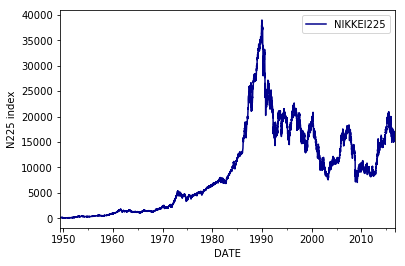

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

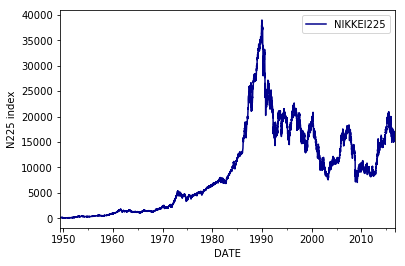

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')
plt.show()

plt.show()を追加することにより出力の仕方が変わりました。

In [31]:
price = web.DataReader("aapl", 'google',"1990/1/4",end)#yahooのサービスの停止により変更
price.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2000-11-03,1.64,1.64,1.57,1.59,125594000


In [32]:
print(price.tail(1))

              Open    High    Low   Close    Volume
Date                                               
2016-09-30  112.46  113.37  111.8  113.05  36379106


## 4.2 データベースの加工

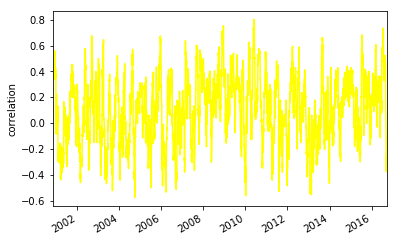

In [33]:
import pandas as pd
fx = web.DataReader('DEXJPUS',"fred",start,end)
port=pd.concat([price.Close,fx],axis=1).dropna()
n=port.Close.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')

              Open    High     Low   Close    Volume
Date                                                
2015-01-02  111.39  111.44  107.35  109.33  53204626
2015-01-05  108.29  108.65  105.41  106.25  64285491


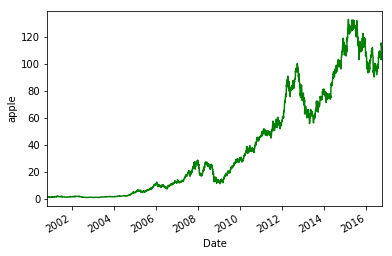

In [46]:
price = web.DataReader("aapl", 'google','1990/1/1',end)#yahooのサービスの停止により変更
price1=price.loc["1990/1/1":]#ixの停止によりlocに変更
price1.Close.plot(color='green')
price2=price["2015"].iloc[0:2]#ixの停止によりilocに変更
print(price2)
plt.ylabel('apple')

In [47]:
print(price.resample('M').first().tail())

              Open    High     Low   Close    Volume
Date                                                
2016-05-31   93.96   94.08   92.40   93.64  47736879
2016-06-30   99.02   99.54   98.33   98.46  29173285
2016-07-31   95.49   96.46   95.33   95.89  26026540
2016-08-31  104.41  106.15  104.41  106.05  38167871
2016-09-30  106.14  106.80  105.62  106.73  26701523


In [48]:
print(price.resample('M').last().tail())

              Open    High     Low   Close    Volume
Date                                                
2016-05-31   99.60  100.40   98.82   99.86  42307212
2016-06-30   94.44   95.77   94.30   95.60  35836356
2016-07-31  104.19  104.55  103.68  104.21  27733688
2016-08-31  105.66  106.57  105.64  106.10  29662406
2016-09-30  112.46  113.37  111.80  113.05  36379106


In [49]:
print(price.resample('M',loffset='1d').last().tail())

              Open    High     Low   Close    Volume
Date                                                
2016-06-01   99.60  100.40   98.82   99.86  42307212
2016-07-01   94.44   95.77   94.30   95.60  35836356
2016-08-01  104.19  104.55  103.68  104.21  27733688
2016-09-01  105.66  106.57  105.64  106.10  29662406
2016-10-01  112.46  113.37  111.80  113.05  36379106


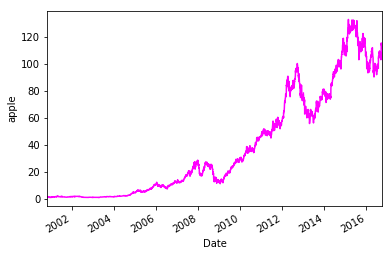

In [50]:
price.resample('A').Close.plot(color='magenta')
plt.ylabel('apple')

## 4.3 データの加工、分析


In [51]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std()*np.sqrt(250)
print(vol,len(price))

0.38543103349 4000


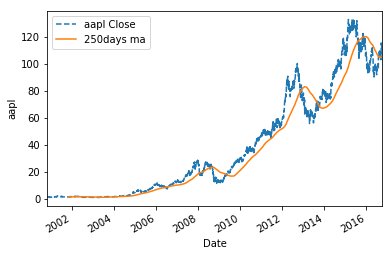

In [52]:
import pandas as pd
ma=pd.Series.rolling(price.Close,window=250).mean()
price.Close.plot(label='aapl Close',style='--')
ma.plot(label='250days ma')
plt.ylabel('aapl')
plt.legend()

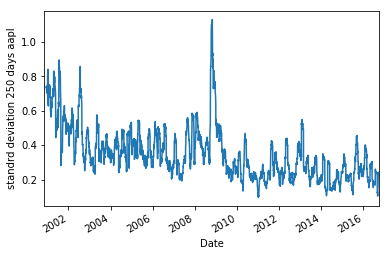

In [53]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=25).std()*np.sqrt(250)).plot()
plt.ylabel('standrd deviation 250 days aapl')